In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [78]:
FOLDERPATH = "C:\\Users\\Benson\\Desktop\\lyftlong\\"
agents_df = pd.read_csv(FOLDERPATH + 'rand_agents_table0.csv')
frame_df = pd.read_csv(FOLDERPATH + 'rand_frames_table1.csv')
scene_df = pd.read_csv(FOLDERPATH + 'rand_scenes_table1.csv')

In [79]:
agents_df = agents_df.merge(frame_df[['frame_index', 'scene_index']], on='frame_index')
agents_df

,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,track_id,PERCEPTION_LABEL_NOT_SET,...,PERCEPTION_LABEL_OTHER_VEHICLE,PERCEPTION_LABEL_BICYCLE,PERCEPTION_LABEL_MOTORCYCLE,PERCEPTION_LABEL_CYCLIST,PERCEPTION_LABEL_MOTORCYCLIST,PERCEPTION_LABEL_PEDESTRIAN,PERCEPTION_LABEL_ANIMAL,AVRESEARCH_LABEL_DONTCARE,frame_index,scene_index
0,698.486755,-2145.407959,4.673678,1.868149,1.693981,0.000000,0.000000,-2.167036,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827
1,675.231079,-2192.097168,5.000620,1.968199,1.885538,0.000000,0.000000,0.986228,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827
2,643.392517,-2245.469971,3.477908,1.227453,0.840264,0.000000,0.000000,-1.492509,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827
3,730.271973,-2107.815430,3.389654,1.930534,1.651110,0.000000,0.000000,0.990256,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827
4,722.959167,-2193.093750,4.205712,0.837930,0.948766,0.000000,0.000000,1.048491,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950238,-491.385742,864.927673,2.848036,0.763638,0.622487,0.000000,0.000000,2.318647,1139,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3831700,15427
1950239,-505.117371,878.250977,2.903636,1.665225,1.623982,-2.190619,-4.000348,1.251474,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3831700,15427
1950240,-481.887299,829.500305,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805097,1141,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3831700,15427
1950241,-496.772369,897.305176,4.354274,1.802668,1.611001,0.000000,0.000000,-3.006293,1142,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3831700,15427


In [80]:
# 0=unknown, 1=car, 2=cyclist, 3=pedestrian

In [81]:

agents_df['speed'] = np.sqrt(agents_df['velocity_x']**2 + agents_df['velocity_y']**2) 
# put speed column before groupby mean
agents_df_grouped = agents_df.groupby(['scene_index','track_id'], as_index = False).mean()
drop_rows = ['PERCEPTION_LABEL_NOT_SET', 'PERCEPTION_LABEL_DONTCARE', 'PERCEPTION_LABEL_MOTORCYCLIST',
             'PERCEPTION_LABEL_ANIMAL']
agents_df_grouped = agents_df_grouped.drop(drop_rows, axis=1)
agents_df_grouped = agents_df_grouped.drop(agents_df_grouped.columns[12:20], axis=1)
# agents_df_grouped['speed'] = np.sqrt(agents_df_grouped['velocity_x']**2 + agents_df_grouped['velocity_y']**2)
agents_df_grouped

,scene_index,track_id,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,PERCEPTION_LABEL_UNKNOWN,PERCEPTION_LABEL_CAR,PERCEPTION_LABEL_CYCLIST,PERCEPTION_LABEL_PEDESTRIAN,AVRESEARCH_LABEL_DONTCARE,frame_index,speed
0,112,1,-458.669061,811.974615,4.011284,1.852369,1.464127,7.684069,-8.310170,-0.830219,0.0,1.0,0.0,0.0,0.0,27937.5,11.318509
1,112,2,-539.189974,915.266052,4.161717,1.656362,1.205087,0.087901,0.142778,-0.825563,0.0,1.0,0.0,0.0,0.0,27831.5,0.201644
2,112,3,-457.571522,821.202000,3.498475,1.977805,1.295687,9.132508,-9.910145,-0.807267,0.0,1.0,0.0,0.0,0.0,27889.0,13.476794
3,112,4,-530.073531,872.338991,3.952882,1.559683,1.175224,-0.046915,0.013216,0.519006,0.0,1.0,0.0,0.0,0.0,27853.0,0.153246
4,112,5,-522.541345,896.300813,4.251729,1.638036,1.282184,1.021973,-1.031020,-0.772174,0.0,1.0,0.0,0.0,0.0,27825.0,1.456870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125459,15982,988,-1012.042969,1433.786743,3.350825,1.283732,0.632749,0.000000,0.000000,-0.778701,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000
125460,15982,989,-1014.040405,1443.542725,0.764975,1.259111,0.950618,0.000000,0.000000,2.381792,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000
125461,15982,990,-1030.072998,1459.969238,1.584556,1.274177,0.566978,0.000000,0.000000,2.405967,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000
125462,15982,991,-949.636292,1391.866455,0.874429,0.437873,0.563465,0.000000,0.000000,-0.000034,1.0,0.0,0.0,0.0,0.0,3969525.0,0.000000


In [82]:
unknown = np.array(agents_df_grouped['PERCEPTION_LABEL_UNKNOWN'])
car = np.array(agents_df_grouped['PERCEPTION_LABEL_CAR'])
cyclist = np.array(agents_df_grouped['PERCEPTION_LABEL_CYCLIST'])
ped = np.array(agents_df_grouped['PERCEPTION_LABEL_PEDESTRIAN'])
category = np.array([unknown, car, cyclist, ped])
category_arr = category.T
categories = np.argmax(category_arr, axis=1)
agents_df_grouped['PERCEPTION_CATEGORY'] = categories
agents_df_grouped

,scene_index,track_id,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,PERCEPTION_LABEL_UNKNOWN,PERCEPTION_LABEL_CAR,PERCEPTION_LABEL_CYCLIST,PERCEPTION_LABEL_PEDESTRIAN,AVRESEARCH_LABEL_DONTCARE,frame_index,speed,PERCEPTION_CATEGORY
0,112,1,-458.669061,811.974615,4.011284,1.852369,1.464127,7.684069,-8.310170,-0.830219,0.0,1.0,0.0,0.0,0.0,27937.5,11.318509,1
1,112,2,-539.189974,915.266052,4.161717,1.656362,1.205087,0.087901,0.142778,-0.825563,0.0,1.0,0.0,0.0,0.0,27831.5,0.201644,1
2,112,3,-457.571522,821.202000,3.498475,1.977805,1.295687,9.132508,-9.910145,-0.807267,0.0,1.0,0.0,0.0,0.0,27889.0,13.476794,1
3,112,4,-530.073531,872.338991,3.952882,1.559683,1.175224,-0.046915,0.013216,0.519006,0.0,1.0,0.0,0.0,0.0,27853.0,0.153246,1
4,112,5,-522.541345,896.300813,4.251729,1.638036,1.282184,1.021973,-1.031020,-0.772174,0.0,1.0,0.0,0.0,0.0,27825.0,1.456870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125459,15982,988,-1012.042969,1433.786743,3.350825,1.283732,0.632749,0.000000,0.000000,-0.778701,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000,1
125460,15982,989,-1014.040405,1443.542725,0.764975,1.259111,0.950618,0.000000,0.000000,2.381792,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000,1
125461,15982,990,-1030.072998,1459.969238,1.584556,1.274177,0.566978,0.000000,0.000000,2.405967,0.0,1.0,0.0,0.0,0.0,3969525.0,0.000000,1
125462,15982,991,-949.636292,1391.866455,0.874429,0.437873,0.563465,0.000000,0.000000,-0.000034,1.0,0.0,0.0,0.0,0.0,3969525.0,0.000000,0


In [83]:
def find_misrecorded_oversized_track_ids(agents_df_grouped):
    """
        filters the objects/track_ids with unusually big lengths/widths from agents_df_grouped.
        In the US, all vehicles cannot have a sidelength that's more than 19.8 meters;
        Some cars in the agent_table have mean extents that are higher than that, 
        so it was likely a data mistake.
        
        Args:
            agents_df_grouped (pd.DataFrame): the agents table AFTER you applied groupby mean, not the original csv agents_df
        Returns:
            (pd.DataFrame): table with misrecorded, oversized track ids
    """    
    # This means getting all rows with extent_x or extent_y that are longer than 19.8
    # "|" means or. We have to check both extents x and y because we don't know which one is length or width.
    # overbig_track_ids is a table with all of those big vehicles
    MAX_LENGTH_VEHICLES = 19.8 # federally mandated maximum length of vehicles in meters
    
    misrecorded_oversized_track_ids_rows = agents_df_grouped[(agents_df_grouped.extent_x > MAX_LENGTH_VEHICLES) |
                                                        (agents_df_grouped.extent_y > MAX_LENGTH_VEHICLES)]
    return misrecorded_oversized_track_ids_rows

def remove_misrecorded_oversized_track_ids_from_given_table(input_agent_table,
                                                            misrecorded_oversized_track_ids_rows):
    # Really confusing operation: To be simple, this just removes all instances of the
    # misrecorded oversized track_ids from the given agent table
    misrecorded_oversized_track_ids_rows = misrecorded_oversized_track_ids_rows[["scene_index", "track_id"]]
    merged = pd.merge(input_agent_table,misrecorded_oversized_track_ids_rows, how='outer', 
                      on=["scene_index", "track_id"], indicator=True)
    left_anti_merge = merged[merged['_merge'] == 'left_only']#.drop(columns=["_merged"])
    left_anti_merge = left_anti_merge.drop(columns=["_merge"])
    input_agent_table_with_oversized_track_ids_removed = left_anti_merge   
    return input_agent_table_with_oversized_track_ids_removed


In [84]:
misrecorded_oversized_track_ids_rows = find_misrecorded_oversized_track_ids(agents_df_grouped)
# remove misrecorded_oversized_track_ids from the original agents_df
agents_df = remove_misrecorded_oversized_track_ids_from_given_table(agents_df,
                                                                    misrecorded_oversized_track_ids_rows)
# remove misrecorded_oversized_track_ids from the agents_df_grouped
agents_df_grouped = remove_misrecorded_oversized_track_ids_from_given_table(agents_df_grouped,
                                                                    misrecorded_oversized_track_ids_rows)

### RANDOM FORESTING

In [85]:
rf_columns = ['scene_index', 'track_id', 'extent_x', 'extent_y', 'extent_z', 'speed', 'PERCEPTION_CATEGORY']
agents_df_small = agents_df_grouped[rf_columns]
agents_df_small

df_known = agents_df_small[agents_df_small['PERCEPTION_CATEGORY'] != 0]
df_train = df_known.iloc[:, 2:]
number = len(df_train[df_train['PERCEPTION_CATEGORY'] == 2])
df_car = df_train[df_train['PERCEPTION_CATEGORY'] == 1]
df_cyc = df_train[df_train['PERCEPTION_CATEGORY'] == 2]
df_ped = df_train[df_train['PERCEPTION_CATEGORY'] == 3]

overall_train_scores = []
overall_test_scores = []
for _ in range(50):
    df_car_sample = df_car.sample(n=number)
    df_ped_sample = df_ped.sample(n=number)
    train_data = pd.concat([df_car_sample, df_ped_sample, df_cyc]).reset_index(drop=True)
    X = train_data.iloc[:, :4]
    y = train_data['PERCEPTION_CATEGORY']

    train_scores = []
    test_scores = []
    for _ in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)
        score_train = rf.score(X_train, y_train)
        score_test = rf.score(X_test, y_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
    overall_train_scores.append(np.mean(train_scores))
    overall_test_scores.append(np.mean(test_scores))

print('Training score: %.5f'
      % np.mean(overall_train_scores))
print('Test score: %.5f'
      % np.mean(overall_test_scores))

Training score: 0.99997
Test score: 0.90746


### Using Random Forest on the unknown category

In [86]:
df_unknown = agents_df_small[agents_df_small['PERCEPTION_CATEGORY'] == 0]
df_unknown_identifers = df_unknown[rf_columns[:2]]
df_unknown_rf_input = df_unknown[rf_columns[2:-1]].to_numpy()

df_unknown_predicted_categories = rf.predict(df_unknown_rf_input)
print(df_unknown_predicted_categories)

[1 1 1 ... 1 2 1]


In [87]:
unknown_prediction_merger = df_unknown_identifers.copy()
unknown_prediction_merger["PERCEPTION_CATEGORY_merger"] = df_unknown_predicted_categories

agents_df_small1 = agents_df_small.copy()
agents_df_small1 = agents_df_small1.merge(unknown_prediction_merger, how="outer",on=['scene_index', 'track_id'])

In [88]:
temp_df1 = agents_df_small1[["PERCEPTION_CATEGORY_merger"]]
temp_df1 = temp_df1.rename(columns={"PERCEPTION_CATEGORY_merger":"PERCEPTION_CATEGORY"})
temp_df2 = agents_df_small1[["PERCEPTION_CATEGORY"]]
temp_df1 = temp_df1.combine_first(temp_df2)

assert np.all(temp_df1["PERCEPTION_CATEGORY"].values != 0)
agents_df_small["PERCEPTION_CATEGORY"] = temp_df1.PERCEPTION_CATEGORY.values.astype(int)
agents_df_small.rename(columns={"PERCEPTION_CATEGORY": "kind"})

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,scene_index,track_id,extent_x,extent_y,extent_z,speed,kind
0,112,1,4.011284,1.852369,1.464127,11.318509,1
1,112,2,4.161717,1.656362,1.205087,0.201644,1
2,112,3,3.498475,1.977805,1.295687,13.476794,1
3,112,4,3.952882,1.559683,1.175224,0.153246,1
4,112,5,4.251729,1.638036,1.282184,1.456870,1
...,...,...,...,...,...,...,...
125459,15982,988,3.350825,1.283732,0.632749,0.000000,1
125460,15982,989,0.764975,1.259111,0.950618,0.000000,1
125461,15982,990,1.584556,1.274177,0.566978,0.000000,1
125462,15982,991,0.874429,0.437873,0.563465,0.000000,2


In [92]:
agents_df_small = agents_df_small.rename(columns={"PERCEPTION_CATEGORY": "kind"})
## All categories have been predicted. There should be NO unknowns (0's) for any classes
assert np.all(agents_df_small["kind"].values != 0)

In [95]:
agents_df

,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,track_id,PERCEPTION_LABEL_NOT_SET,...,PERCEPTION_LABEL_BICYCLE,PERCEPTION_LABEL_MOTORCYCLE,PERCEPTION_LABEL_CYCLIST,PERCEPTION_LABEL_MOTORCYCLIST,PERCEPTION_LABEL_PEDESTRIAN,PERCEPTION_LABEL_ANIMAL,AVRESEARCH_LABEL_DONTCARE,frame_index,scene_index,speed
0,698.486755,-2145.407959,4.673678,1.868149,1.693981,0.000000,0.000000,-2.167036,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944117,7827,0.000000
1,697.101990,-2147.395020,2.686584,2.049561,1.677582,0.000000,0.000000,-2.157741,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944118,7827,0.000000
2,696.559937,-2148.291748,2.782353,2.018085,1.685846,-5.663389,-8.918378,-2.160171,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944119,7827,10.564631
3,695.944641,-2149.177734,2.868769,2.045774,1.666778,-6.061299,-9.179122,-2.161492,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944120,7827,10.999801
4,695.390137,-2150.040283,3.034343,1.985472,1.678996,-6.225703,-9.163996,-2.164186,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1944121,7827,11.078727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950238,-505.117371,878.250977,2.903636,1.665225,1.623982,-2.190619,-4.000348,1.251474,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3831700,15427,4.560876
1950239,-481.885895,829.501648,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805076,1141,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3831699,15427,0.000000
1950240,-481.887299,829.500305,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805097,1141,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3831700,15427,0.000000
1950241,-496.772369,897.305176,4.354274,1.802668,1.611001,0.000000,0.000000,-3.006293,1142,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3831700,15427,0.000000


In [97]:
# We must now combine extent_x, extent_y, and kind into the original table agents_df

agents_df_small["mean_area"] = agents_df_small["extent_x"] * agents_df_small["extent_y"]

agents_df = agents_df.merge(agents_df_small[["mean_area", "kind", "track_id", "scene_index"]], on=["track_id", "scene_index"])
agents_df

,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,track_id,PERCEPTION_LABEL_NOT_SET,...,PERCEPTION_LABEL_CYCLIST,PERCEPTION_LABEL_MOTORCYCLIST,PERCEPTION_LABEL_PEDESTRIAN,PERCEPTION_LABEL_ANIMAL,AVRESEARCH_LABEL_DONTCARE,frame_index,scene_index,speed,mean_area,kind
0,698.486755,-2145.407959,4.673678,1.868149,1.693981,0.000000,0.000000,-2.167036,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1944117,7827,0.000000,6.967935,1
1,697.101990,-2147.395020,2.686584,2.049561,1.677582,0.000000,0.000000,-2.157741,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1944118,7827,0.000000,6.967935,1
2,696.559937,-2148.291748,2.782353,2.018085,1.685846,-5.663389,-8.918378,-2.160171,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1944119,7827,10.564631,6.967935,1
3,695.944641,-2149.177734,2.868769,2.045774,1.666778,-6.061299,-9.179122,-2.161492,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1944120,7827,10.999801,6.967935,1
4,695.390137,-2150.040283,3.034343,1.985472,1.678996,-6.225703,-9.163996,-2.164186,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1944121,7827,11.078727,6.967935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946043,-505.117371,878.250977,2.903636,1.665225,1.623982,-2.190619,-4.000348,1.251474,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,3831700,15427,4.560876,4.686579,1
1946044,-481.885895,829.501648,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805076,1141,0.0,...,0.0,0.0,1.0,0.0,0.0,3831699,15427,0.000000,0.447010,3
1946045,-481.887299,829.500305,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805097,1141,0.0,...,0.0,0.0,1.0,0.0,0.0,3831700,15427,0.000000,0.447010,3
1946046,-496.772369,897.305176,4.354274,1.802668,1.611001,0.000000,0.000000,-3.006293,1142,0.0,...,0.0,0.0,0.0,0.0,0.0,3831700,15427,0.000000,7.849310,1


### PART 2: Designating agents as on or off road

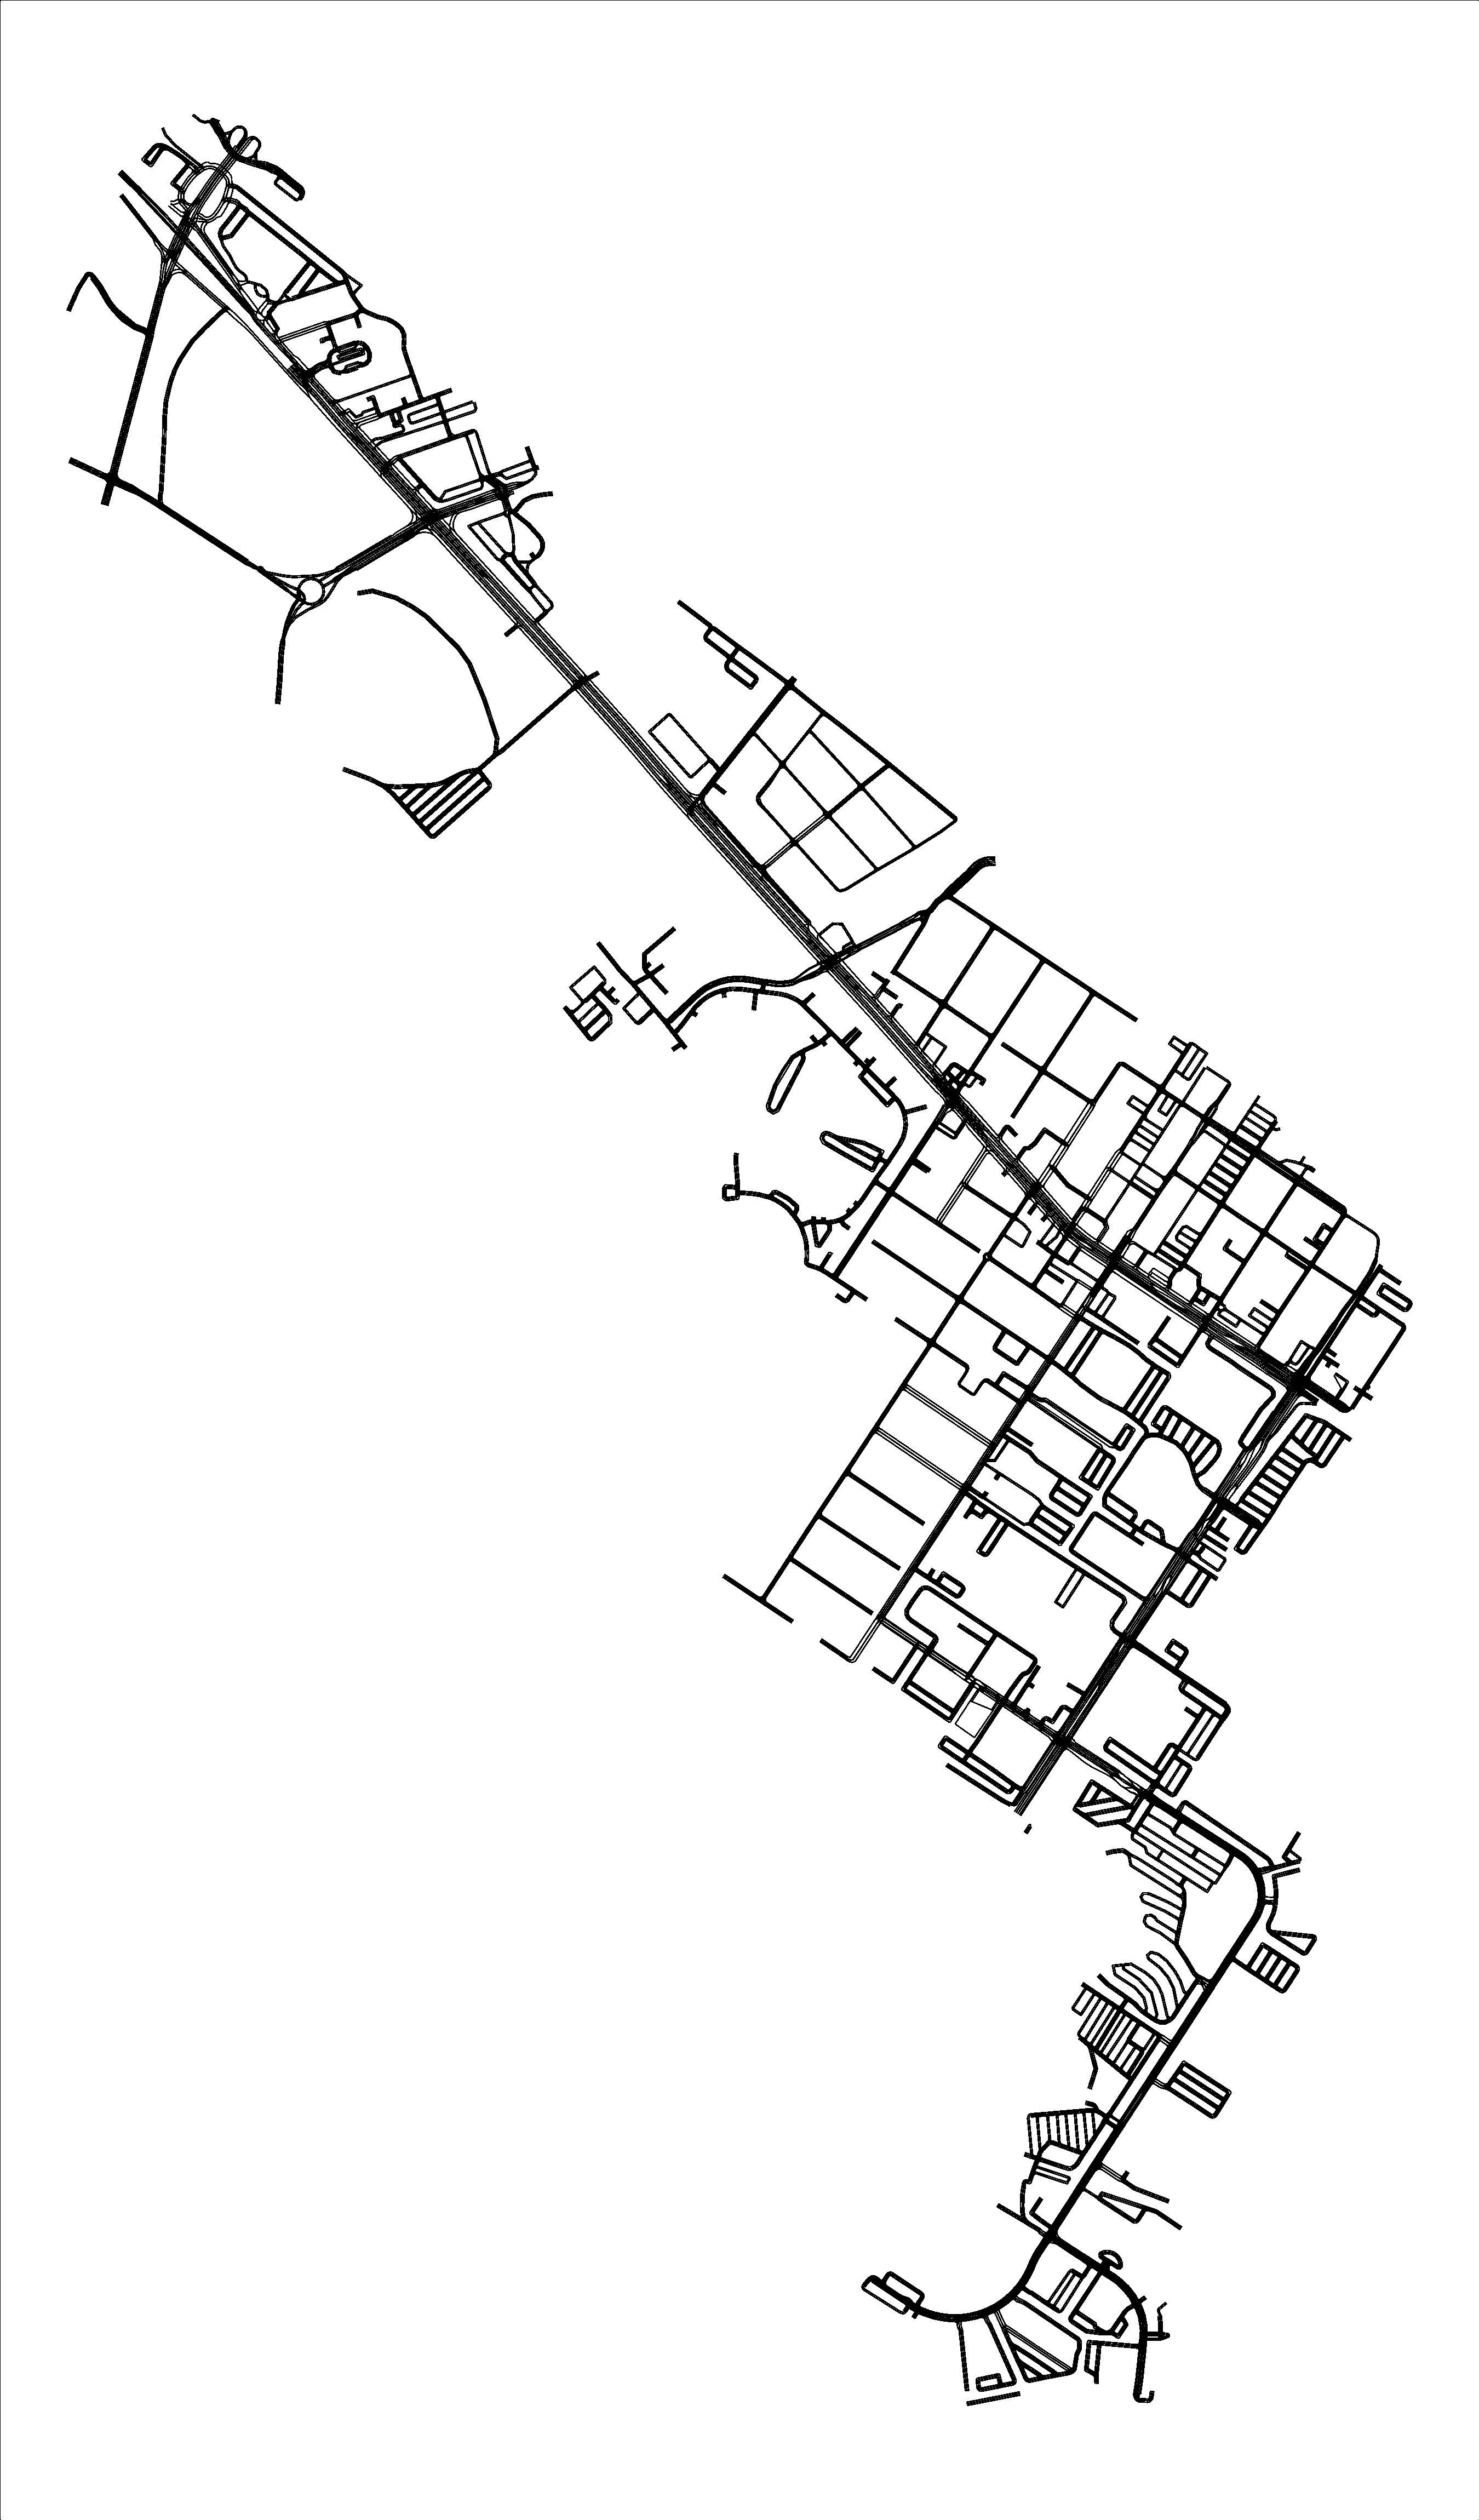

In [98]:
%matplotlib inline
import math as math
import pandas as pd
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from PIL import Image


folderpath = "C:\\Users\\Benson\\Desktop"

file = folderpath + "\\lyftlong\\crosswalks_table0.csv"
cw_df = pd.read_csv(file)

def palo_locate(agent_coords, Actual_roadmap):
    # returns a binary list if on or off the road
    
    agent_coords = agent_coords.astype(int) # the x and y coords of the agent table as an array
    
    # The agent table's origin was at (0,0), but for this picture, 
    agent_coords[:,0] = agent_coords[:,0] + 1300 - 15 
    agent_coords[:,1] = agent_coords[:,1] + 2700 + 73
    Actual_roadmap_arr = np.array(Actual_roadmap)
    
    if len(Actual_roadmap_arr.shape) != 2:
        Actual_roadmap_arr = np.dot(Actual_roadmap_arr[...,:3], [0.2989, 0.5870, 0.1140])
    
    on_road = Actual_roadmap_arr[::-1][agent_coords[:,1], agent_coords[:,0]]
    
    return 1-on_road


# This is what the map of our ENTIRE DATASET LOOKS like
mapfile = folderpath + "\\lyftlong\\palo_alto_proper.png"
Actual_roadmap = Image.open(mapfile)
Actual_roadmap

In [100]:
# get coordinates of all the agents in the agent table
agents_df_coords = agents_df[['centroid_x', 'centroid_y']].to_numpy()

on_road = palo_locate(agents_df_coords, Actual_roadmap)

agents_df["on_road"] = on_road
agents_df

,centroid_x,centroid_y,extent_x,extent_y,extent_z,velocity_x,velocity_y,yaw,track_id,PERCEPTION_LABEL_NOT_SET,...,PERCEPTION_LABEL_MOTORCYCLIST,PERCEPTION_LABEL_PEDESTRIAN,PERCEPTION_LABEL_ANIMAL,AVRESEARCH_LABEL_DONTCARE,frame_index,scene_index,speed,mean_area,kind,on_road
0,698.486755,-2145.407959,4.673678,1.868149,1.693981,0.000000,0.000000,-2.167036,1,0.0,...,0.0,0.0,0.0,0.0,1944117,7827,0.000000,6.967935,1,1
1,697.101990,-2147.395020,2.686584,2.049561,1.677582,0.000000,0.000000,-2.157741,1,0.0,...,0.0,0.0,0.0,0.0,1944118,7827,0.000000,6.967935,1,1
2,696.559937,-2148.291748,2.782353,2.018085,1.685846,-5.663389,-8.918378,-2.160171,1,0.0,...,0.0,0.0,0.0,0.0,1944119,7827,10.564631,6.967935,1,1
3,695.944641,-2149.177734,2.868769,2.045774,1.666778,-6.061299,-9.179122,-2.161492,1,0.0,...,0.0,0.0,0.0,0.0,1944120,7827,10.999801,6.967935,1,1
4,695.390137,-2150.040283,3.034343,1.985472,1.678996,-6.225703,-9.163996,-2.164186,1,0.0,...,0.0,0.0,0.0,0.0,1944121,7827,11.078727,6.967935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946043,-505.117371,878.250977,2.903636,1.665225,1.623982,-2.190619,-4.000348,1.251474,1140,0.0,...,0.0,0.0,0.0,0.0,3831700,15427,4.560876,4.686579,1,1
1946044,-481.885895,829.501648,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805076,1141,0.0,...,0.0,1.0,0.0,0.0,3831699,15427,0.000000,0.447010,3,0
1946045,-481.887299,829.500305,0.646427,0.691510,1.779913,0.000000,0.000000,-0.805097,1141,0.0,...,0.0,1.0,0.0,0.0,3831700,15427,0.000000,0.447010,3,0
1946046,-496.772369,897.305176,4.354274,1.802668,1.611001,0.000000,0.000000,-3.006293,1142,0.0,...,0.0,0.0,0.0,0.0,3831700,15427,0.000000,7.849310,1,1


### SAVE THE AGENT_DF FOREVER, SO BACK UP THE ORIGINAL FILE WITH SOME FORM OF A COPY

In [ ]:
agents_df.to_csv(FOLDERPATH + 'rand_agents_table0_scene_3kind_onroadDiscrete.csv', index=False)

### Creating crosswalks polygon list and pickling it

In [101]:
from shapely.geometry import Point, Polygon 

folderpath = "C:\\Users\\Benson\\Desktop\\"
cw_df_orig = pd.read_csv(folderpath + "lyftlong\\crosswalks_table0.csv")
cw_df = cw_df_orig.copy()
cw_df["pairs"] = list(np.dstack((cw_df.cw_coord_x.values, cw_df.cw_coord_y.values))[0] )
polygon_vertices_list = cw_df.groupby('cw_id')["pairs"].apply(list)

crosswalk_polygon_list = [Polygon(polygon_vertices) for polygon_vertices in polygon_vertices_list]

import pickle

pickle_filename = "Crosswalk_Polygons_List.pkl"
pickle_file = open(pickle_filename, 'wb')   # Pickle file is newly created where foo1.py is
pickle.dump(polygon_vertices_list, pickle_file)          # dump data to f
pickle_file.close()